In [24]:
import numpy as np
import sys
!{sys.executable} -m pip install opencv-python
import cv2
import csv
file_path = 'resources/ms1.mzML'
file_name = file_path.split('/')[1]
img = cv2.imread(file_path.split('.')[0] + "_labeled.jpg")
HEIGHT, WIDTH = img.shape[0], img.shape[1]
h = 200
w = 200
print('program starting...')

program starting...


In [25]:
i, j = 0, 0
while i + w < WIDTH:
    j = 0
    while j + h < HEIGHT:
        temp = img[j:j+h, i:i+w]
        if not cv2.imwrite(f'windows/{file_name}_{int(i//w)}_{int(j//h)}.png', temp):
            print(f'windows/{file_name}_{int(i//w)}_{int(j//h)}.png failed')
        j += h//2
    i += w//2
print('finished saving frames')

finished saving frames


In [35]:
feature_bbox = np.load(f'{file_path}_feature_bbox.npy')
arr = []
for box in feature_bbox:
        left, top, right, bot = box[0], box[1], box[2], box[3]
        if left//w == right//w and top//h == bot//h:
            arr.append([f'windows/{file_name}_{int(left//w)}_{int(bot//h)}.png', int(left%w), int(bot%h), int(right%w), int(top%h), 'feature'])
arr.sort(key=lambda x:x[0])
with open(f'annotations/{file_name}_annotations.csv', mode='w') as file:
    writer = csv.writer(file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    writer.writerows(arr)
print(f'finished wrting annotation file for {file_name}')

finished wrting annotation file for ms1.mzML


In [36]:
import os
import matplotlib.pyplot as plt
for f in os.listdir('windows/')[:100]:
    temp_file = 'windows/' + f
    train_img = cv2.imread(temp_file)
    bbox = [[e[1], e[2], e[3], e[4]] for e in arr if e[0] == temp_file]
    for box in bbox:
        train_img = cv2.rectangle(train_img, (box[0], box[1]), (box[2], box[3]), (255, 70, 70), 1)
    plt.figure()
    plt.imshow(train_img, cmap='gray')

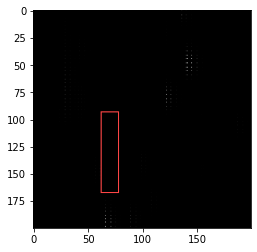

In [20]:
f = f'windows/{file_name}_0_0.png'
img = cv2.imread(f)
img = cv2.rectangle(img, (4462%200, 6767%200), (4478%200, 6693%200), (255, 70, 70), 1)
plt.figure()
plt.imshow(img)